**Name of the task : SuperStore Data Analysis**

---



**Task category :Data Analytics**

**Performed by : J VIJAY RATNAM RAJU**

Objectives of the stduy : To find out the weak areas where the business manager can work to make more profit and deriving the business problems by exploring
the data   
Type of Data: sample super store data  
Model used : Exploratory Data Analysis   
Source of data :


**STEPS INVOLVED**

Defining the problem  
Checking versions of libraries  
Importing libraries into this notebook  
Cleaning the Data-  Pre-Processing of Data  
Summarizing data set to extract actionable insights  
Visualization of data  
Conclusion


# **Importing Important Libraries**

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn import datasets
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import os
print("libraries imported successfully")

libraries imported successfully


**Reading dataset**

In [92]:
ssd = pd.read_csv ("SampleSuperstore.csv")

**pre-processing of data & Exploratory data analysis**

**Dimensions of the data**

In [93]:
ssd.shape

(9994, 13)

**Peek at the data**

In [94]:
ssd.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [95]:
ssd.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [96]:
ssd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**Columns in the data**

In [97]:
ssd.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

**Category types in data**

In [98]:
ssd["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

**Types of Sub-Category**

In [99]:
ssd["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

**Types in segments**

In [100]:
ssd["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

**Dropping of Postal Code Column**

In [101]:
ssd=ssd.drop(columns=["Postal Code"],axis=1)

**Peek at the Data**

In [102]:
ssd.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Number of products in each categorty**

In [103]:
ssd['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

**Total Number of Products in all categories**

In [104]:
ssd['Category'].value_counts().sum()

9994

**Number of sub-categories products are divided**

In [105]:
ssd['Sub-Category'].nunique()

17

**Number of products in each sub-category**

In [106]:
ssd['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

**Types of regions**

In [107]:
ssd['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

**Types of Shipmodels**

In [108]:
ssd['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Unique States**

In [110]:
ssd["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

**Unique Cities**

In [111]:
ssd['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

**Number of unique values in each column**

In [112]:
ssd.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**Full summary of data**

In [113]:
ssd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


# **Stastical summary of data**

In [114]:
ssd.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


**Total number of null values in data**

In [115]:
ssd.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**Data types**

In [116]:
ssd.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

**Unique data in each column**

In [117]:
ssd.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

**Unique data in each column**

In [118]:
for col in ssd:
  print(ssd[col].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 

**Number of duplicate values in data**

In [119]:
ssd.duplicated().sum()

50

**Visualization of missing values**

<Axes: >

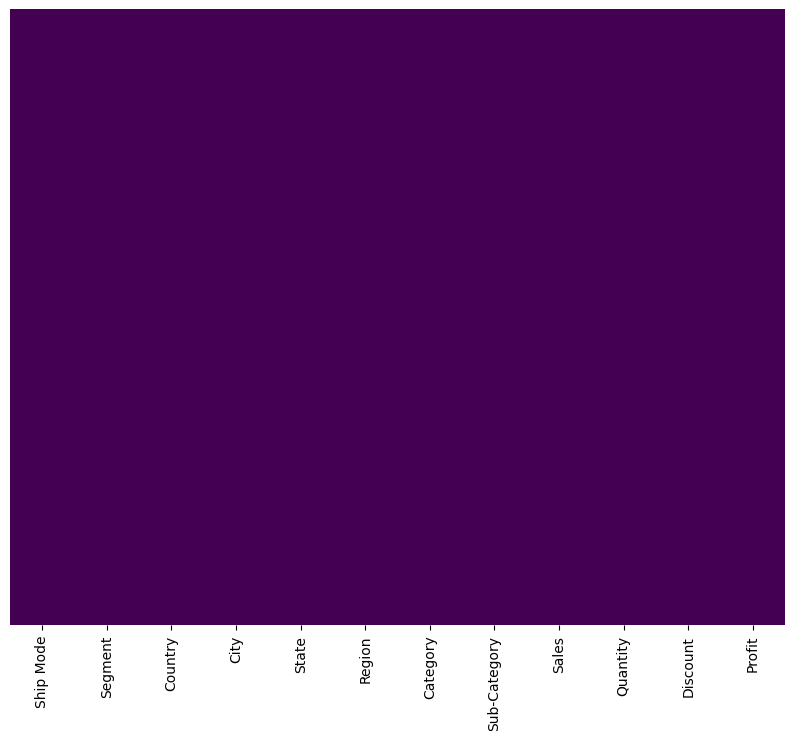

In [120]:
sns.heatmap(ssd.isnull(),yticklabels=False,cbar=False,cmap="viridis")

**Dropping of duplicate values**

In [121]:
ssd.drop_duplicates(inplace=True)

# **Correlation among the Columns**

In [122]:
ssd.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


corr() function to find the correlation among the columns. we are only having four numeric columns in the dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe.Any na values are automatically excluded.For any non-numeric data type columns in the dataframe it is ignored

**Covariance between set of variables**

In [123]:
ssd.cov()

,Sales,Quantity,Discount,Profit
Sales,390181.082925,279.088165,-3.693757,70277.064208
Quantity,279.088165,4.967335,0.003825,34.591355
Discount,-3.693757,0.003825,0.042677,-10.670204
Profit,70277.064208,34.591355,-10.670204,55150.469191


covariance provides the a measure of strength of correlation between two variables or more set of variables.  
The covariance matrix element cij is the covariance of xi and xj.The element cii is the variance if xi  
If COV(xi, xj) = 0 then variables are uncorrelated  
If COV(xi, xj) > 0 then variables positively correlated  
If COV(xi, xj) < 0 then varibales negatively correlated  

**Slicing of data**

In [124]:
ssd.iloc[0]

Ship Mode        Second Class
Segment              Consumer
Country         United States
City                Henderson
State                Kentucky
Region                  South
Category            Furniture
Sub-Category        Bookcases
Sales                  261.96
Quantity                    2
Discount                  0.0
Profit                41.9136
Name: 0, dtype: object

In [125]:
ssd.iloc[:,0]

0         Second Class
1         Second Class
2         Second Class
3       Standard Class
4       Standard Class
             ...      
9989      Second Class
9990    Standard Class
9991    Standard Class
9992    Standard Class
9993      Second Class
Name: Ship Mode, Length: 9944, dtype: object

**Summary of data**

In [126]:
ssd.value_counts()

Ship Mode       Segment      Country        City           State       Region   Category         Sub-Category  Sales    Quantity  Discount  Profit   
First Class     Consumer     United States  Abilene        Texas       Central  Office Supplies  Appliances    1.392    2         0.8       -3.7584      1
Standard Class  Consumer     United States  San Francisco  California  West     Office Supplies  Binders       12.176   1         0.2        4.4138      1
                                                                                                 Art           45.980   2         0.0        12.8744     1
                                                                                                               59.520   3         0.0        15.4752     1
                                                                                                               60.450   3         0.0        16.3215     1
                                                                           

**Summary of data**

In [127]:
ssd.value_counts()

Ship Mode       Segment      Country        City           State       Region   Category         Sub-Category  Sales    Quantity  Discount  Profit   
First Class     Consumer     United States  Abilene        Texas       Central  Office Supplies  Appliances    1.392    2         0.8       -3.7584      1
Standard Class  Consumer     United States  San Francisco  California  West     Office Supplies  Binders       12.176   1         0.2        4.4138      1
                                                                                                 Art           45.980   2         0.0        12.8744     1
                                                                                                               59.520   3         0.0        15.4752     1
                                                                                                               60.450   3         0.0        16.3215     1
                                                                           

# **Visualization of data**

**Bar plot Between Sub-Category vs Category**

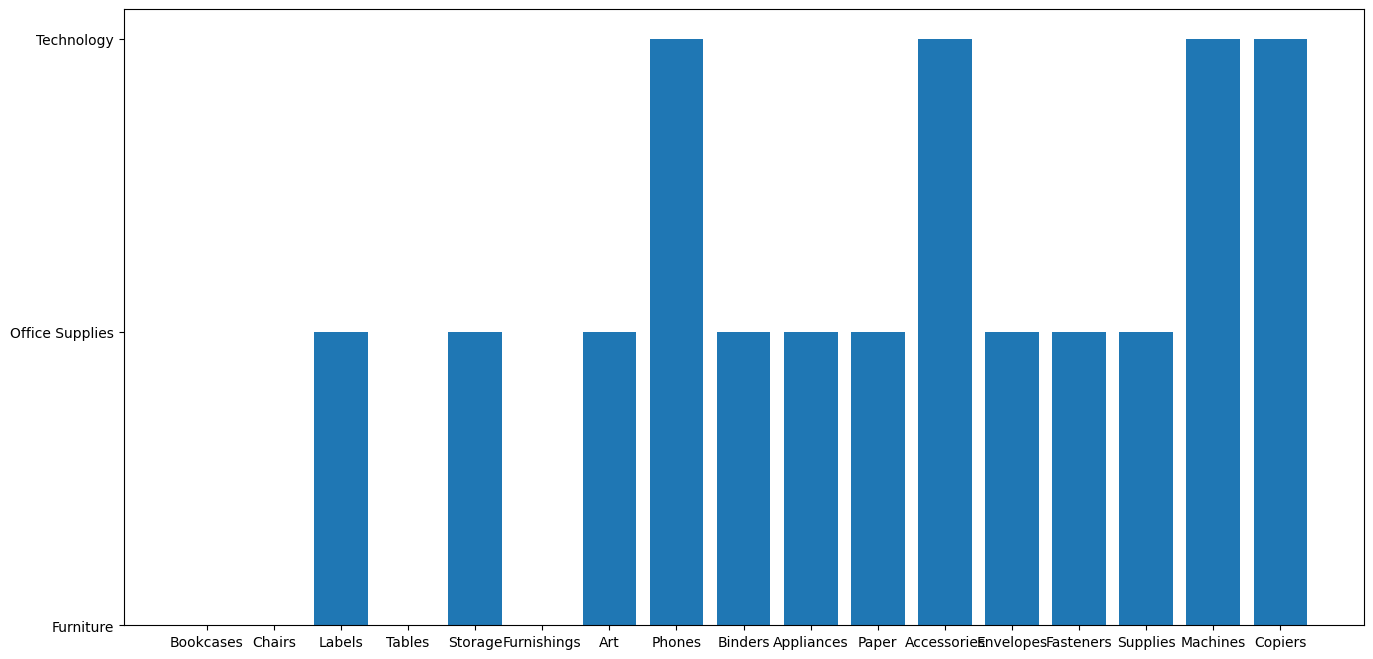

In [128]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=ssd)
plt.show()

In furniture category the frequency of individual item is very less  
In office supplies the frequency of individual item is medium  
In technology the frequency of individual item is high  

**Pie Plot of Sub-Category**

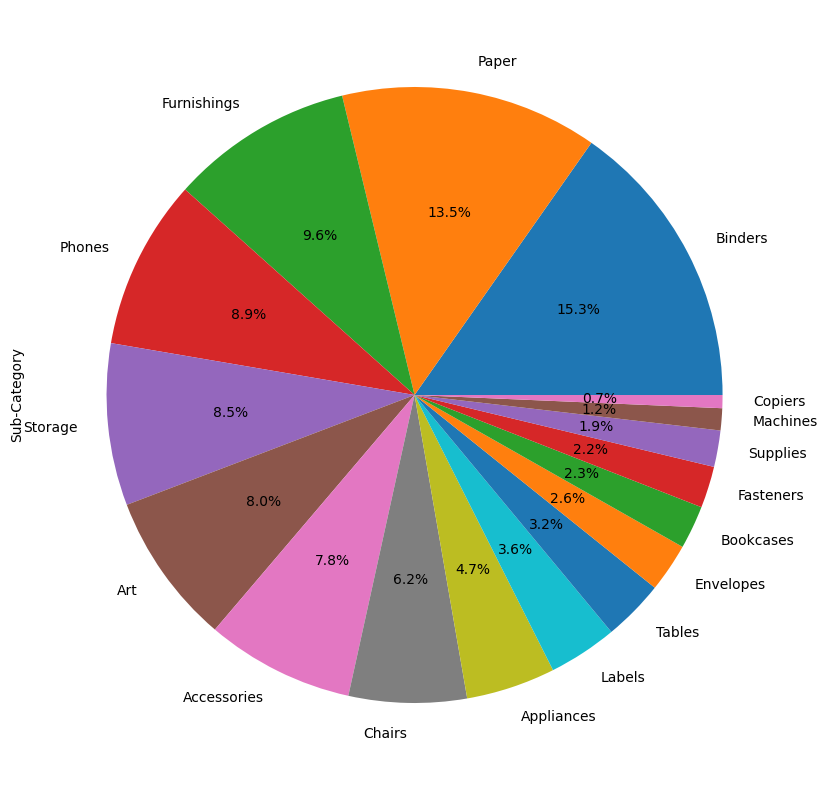

In [129]:
plt.figure(figsize=(12,10))
ssd['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

The store has wide variety of office supplies especially in Binders and Paper department

**Bar plot of Sales Vs Profit**

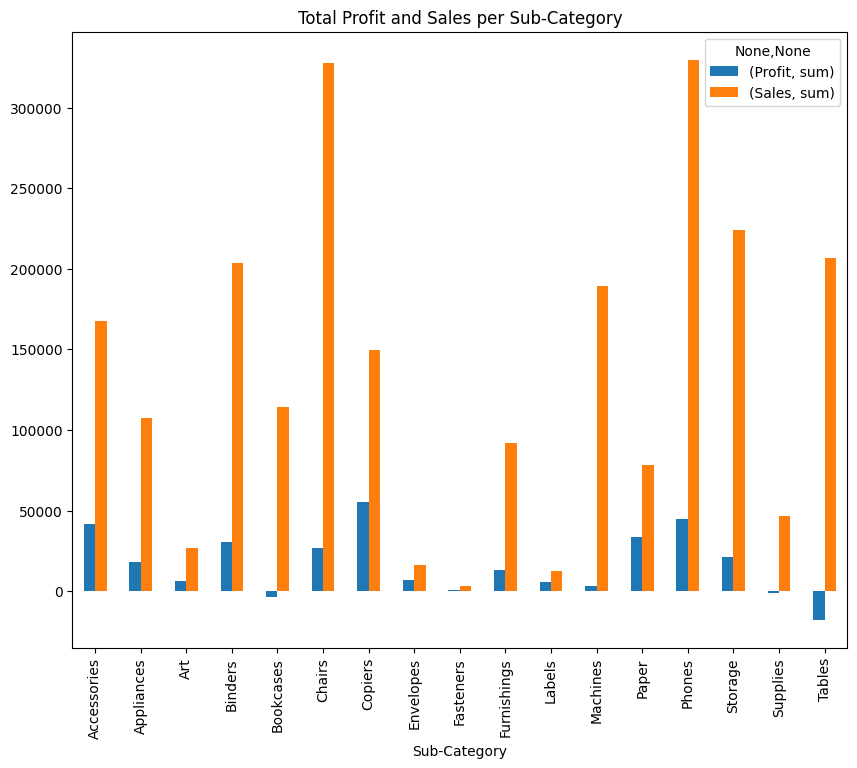

In [130]:
ssd.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title("Total Profit and Sales per Sub-Category")
# plt.legend('Profit')
#plt.legend('Sales')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

Highest profit is earned in copiers while selling price for charis and phones is extremely high compared to other products.  

Another interesting fact- people dont prefer to buy Tables from Superstore.Hence these deapartments are in loss

**Count Plot of Cities**

California              1980
New York                1119
Texas                    980
Pennsylvania             581
Washington               502
Illinois                 490
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

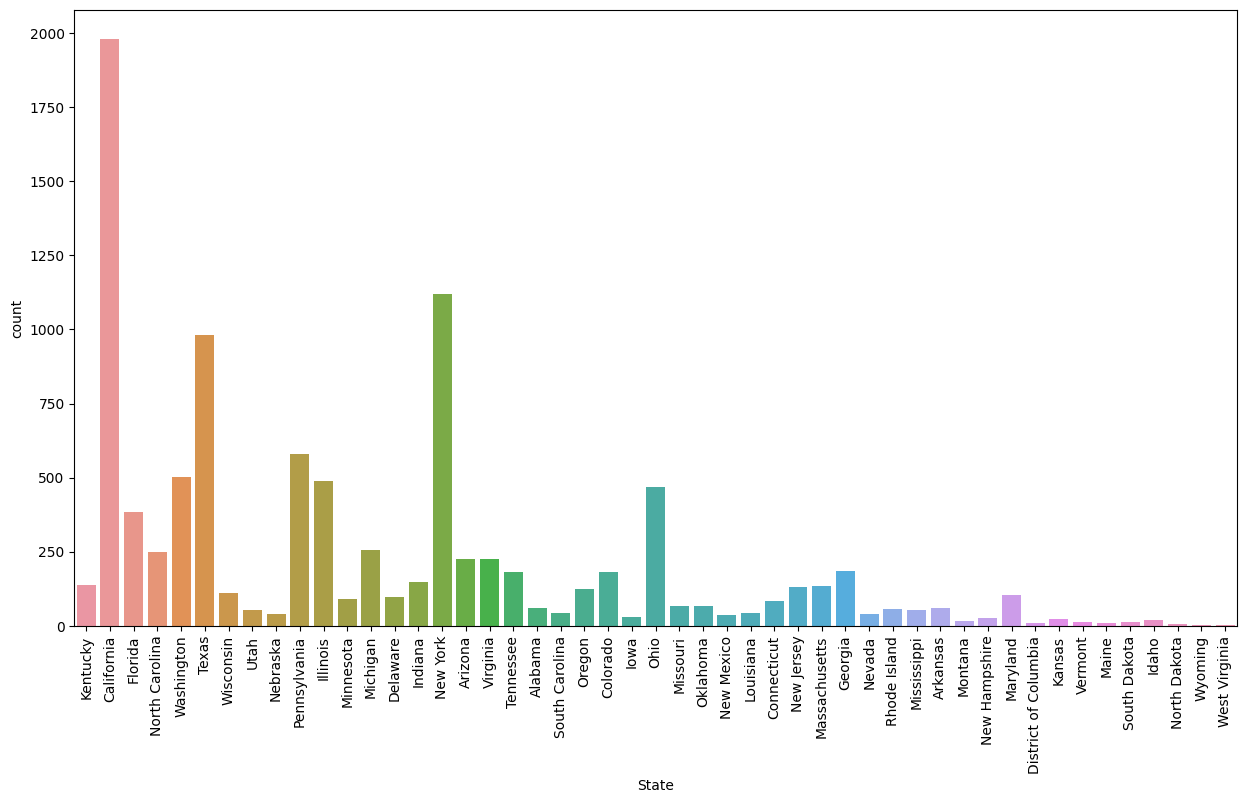

In [131]:
print(ssd['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=ssd['State'])
plt.xticks(rotation=90)
plt.show()


**Saels and Profit Region wise**

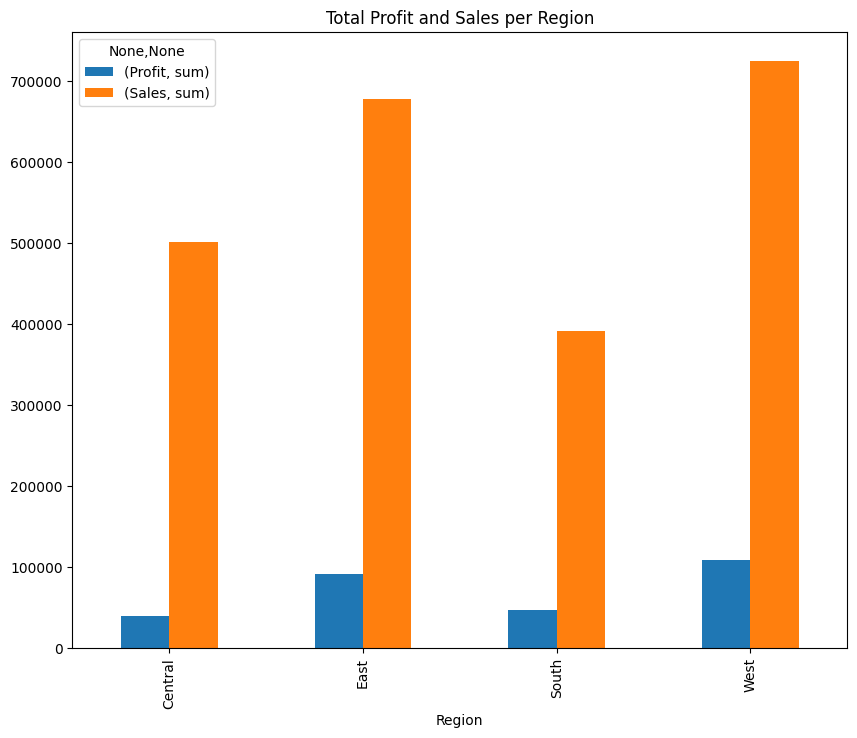

In [132]:
ssd.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title("Total Profit and Sales per Region")
# plot.legend('Profit')
# plot.legend('Sales')
plt.rcParams['figure.figsize']=[10,8]
plt.show()

**Count plot of Sub-Categories**

Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


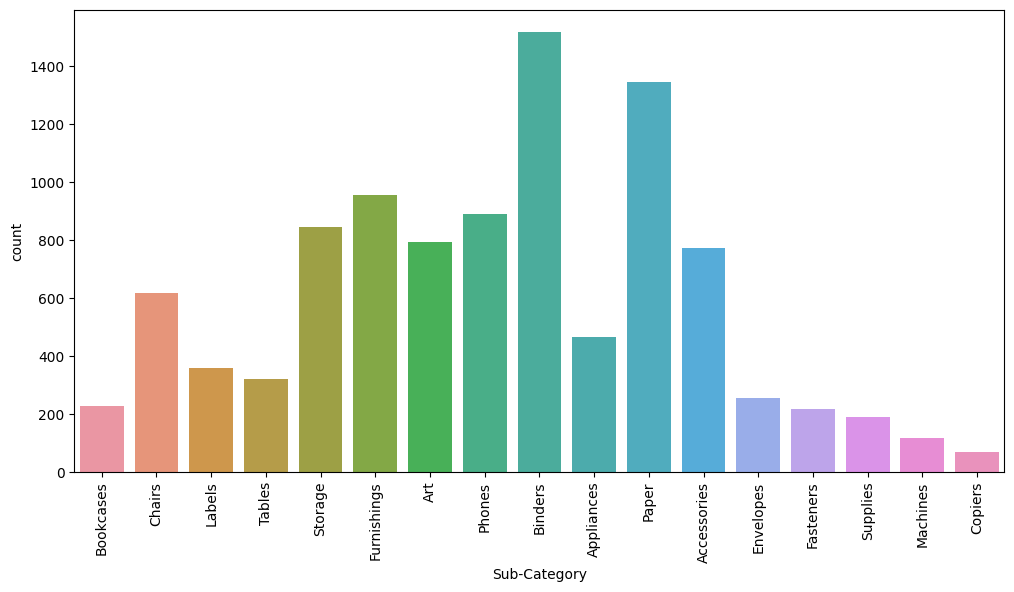

In [133]:
print(ssd['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=ssd['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

# **Heat map of correlation among the columns**

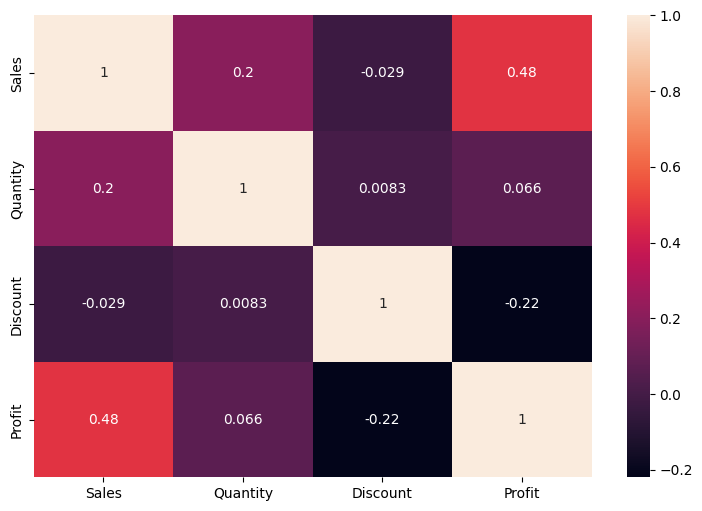

In [134]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(ssd.corr(), annot= True)
plt.show()


# **Heat map of Covariance among the set of variables**



<function matplotlib.pyplot.show(close=None, block=None)>

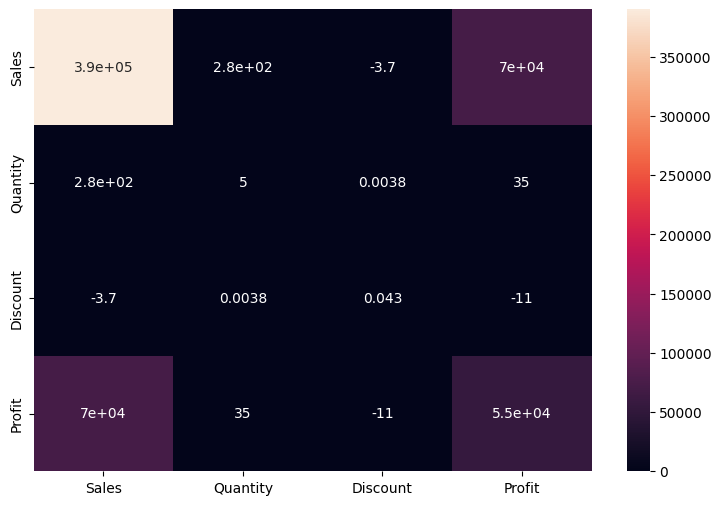

In [135]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(ssd.cov(), annot= True)
plt.show

# **Counter  plot of Segment**

<Axes: xlabel='Segment', ylabel='count'>

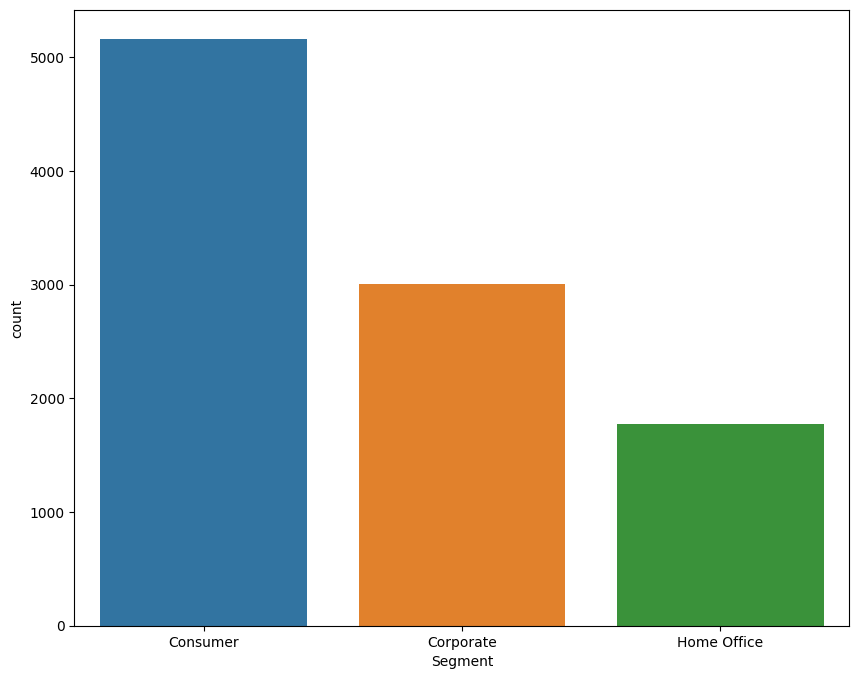

In [136]:
sns.countplot(x=ssd['Segment'])

**Count plot of Region**

<Axes: xlabel='Region', ylabel='count'>

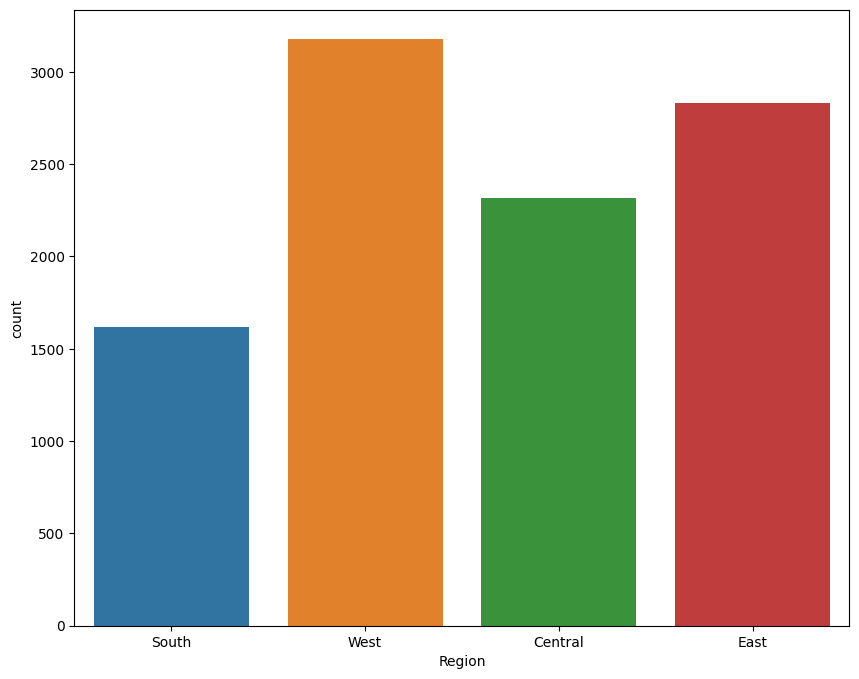

In [137]:
sns.countplot(x=ssd['Region'])

# **Bar plot of Sub-Category Vs Profit**



<Axes: xlabel='Sub-Category', ylabel='Profit'>

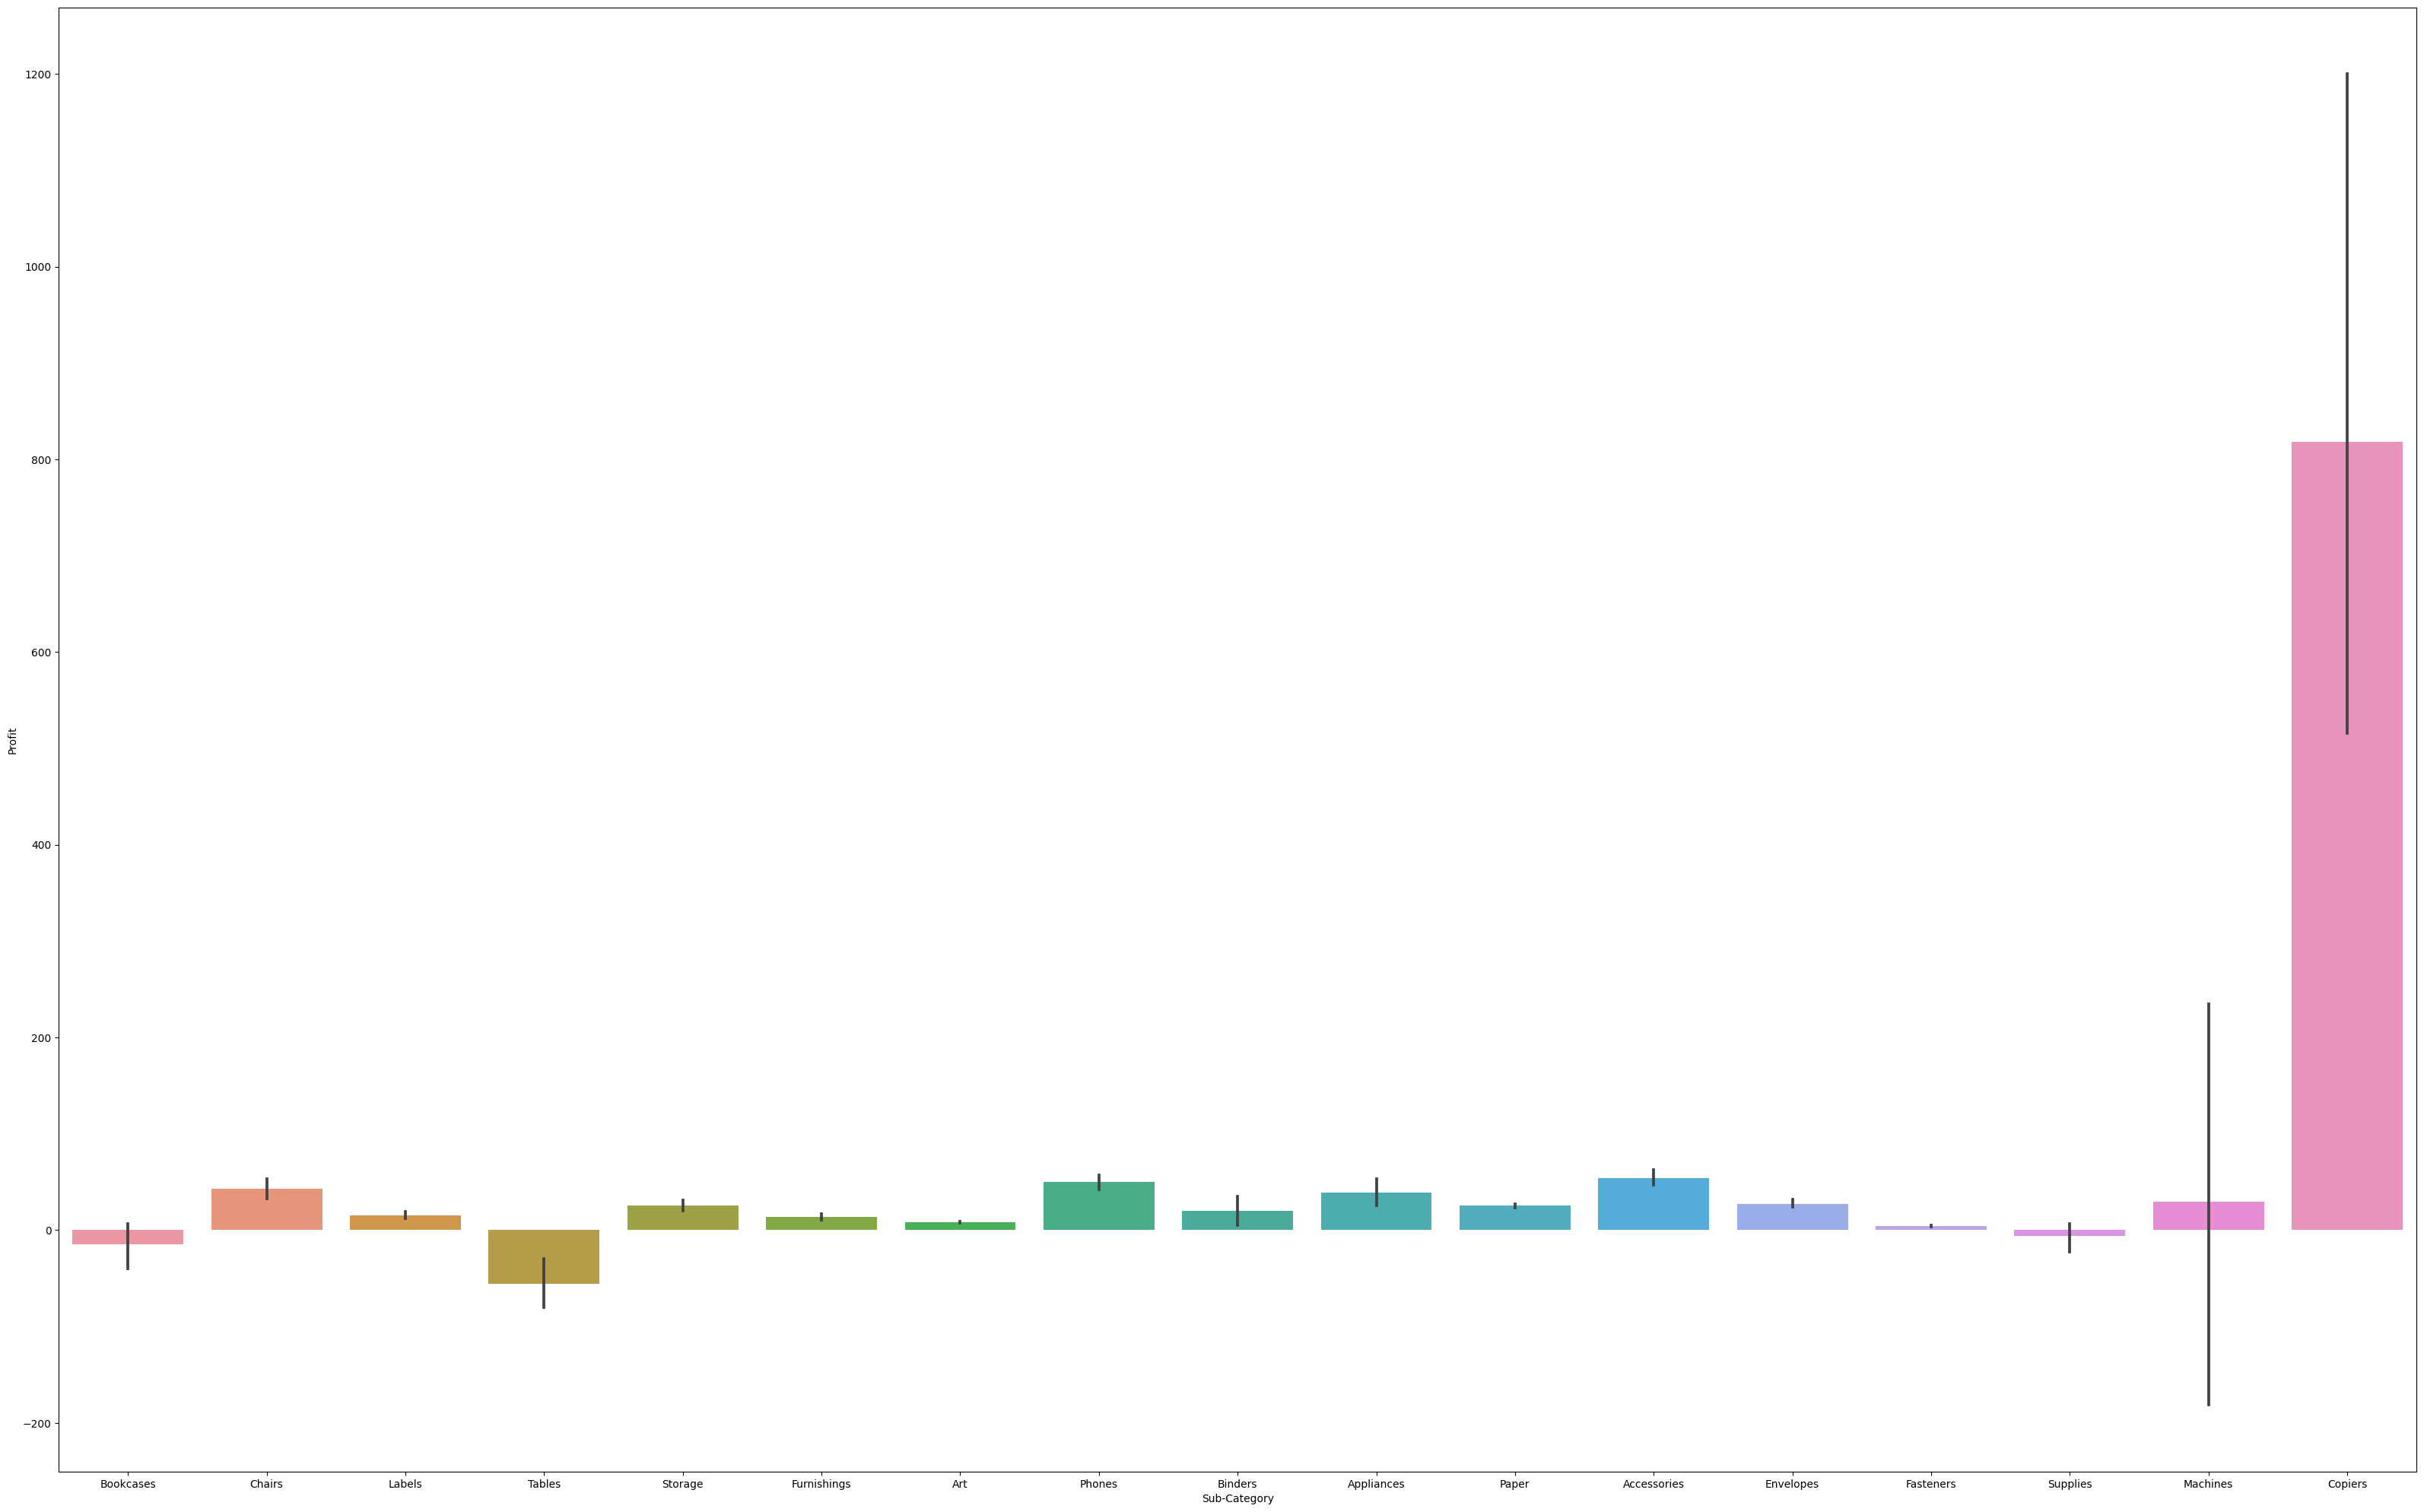

In [138]:
plt.figure(figsize=(40,25))
sns.barplot(x=ssd['Sub-Category'],y=ssd['Profit'])

# **Line plot of Discount vs. Profit**

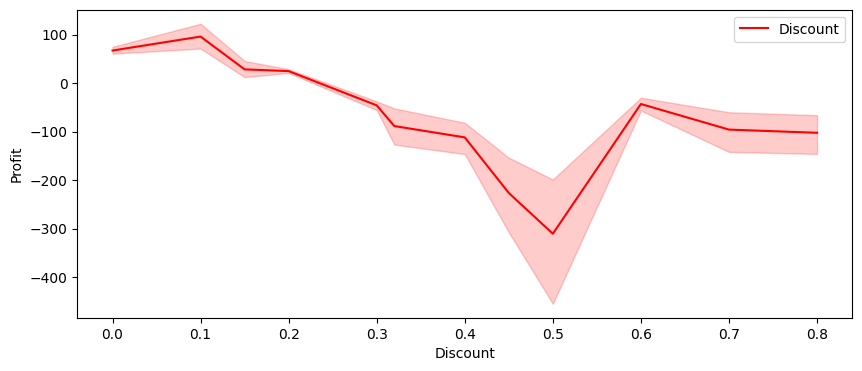

In [139]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Discount', y='Profit', data=ssd, color='r', label='Discount')
plt.legend()

**Histogram of data**

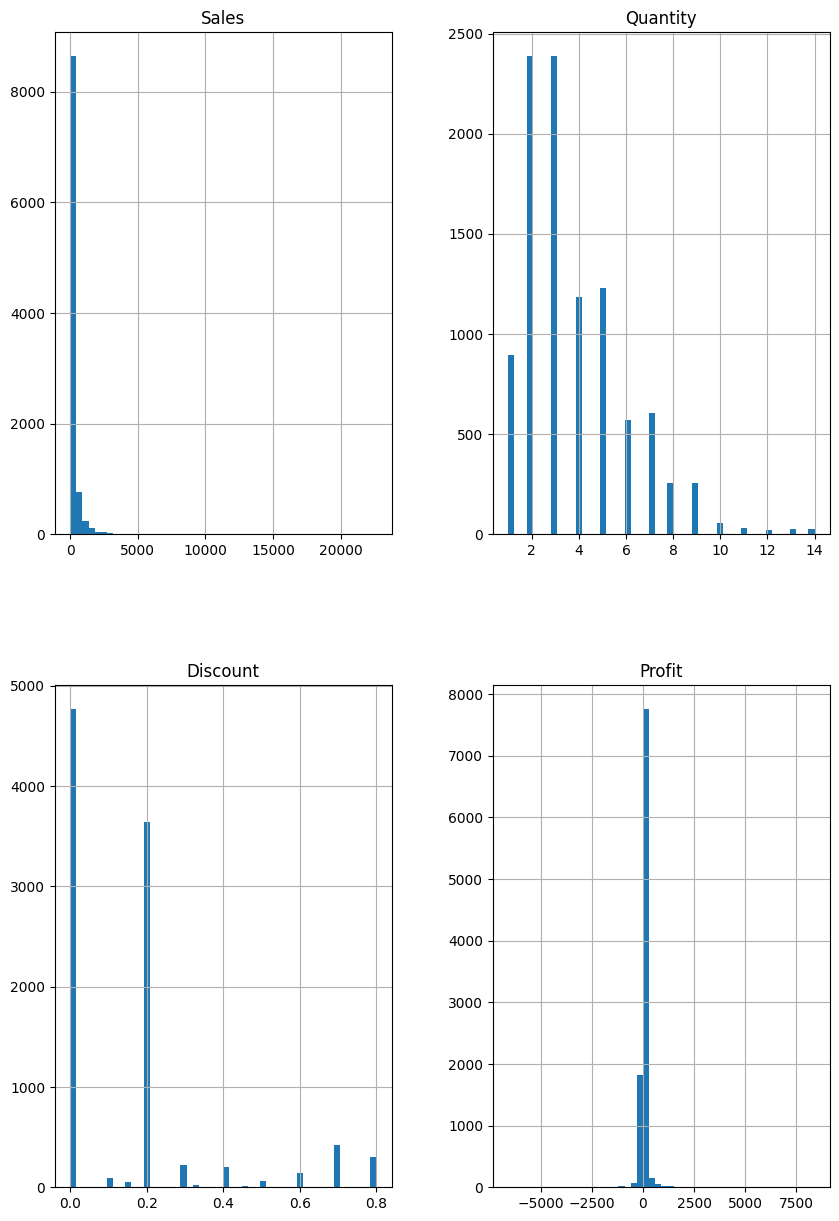

In [140]:
ssd.hist(bins=50 , figsize=(10,15))
plt.show()

**Pair plot of Sub-Category**

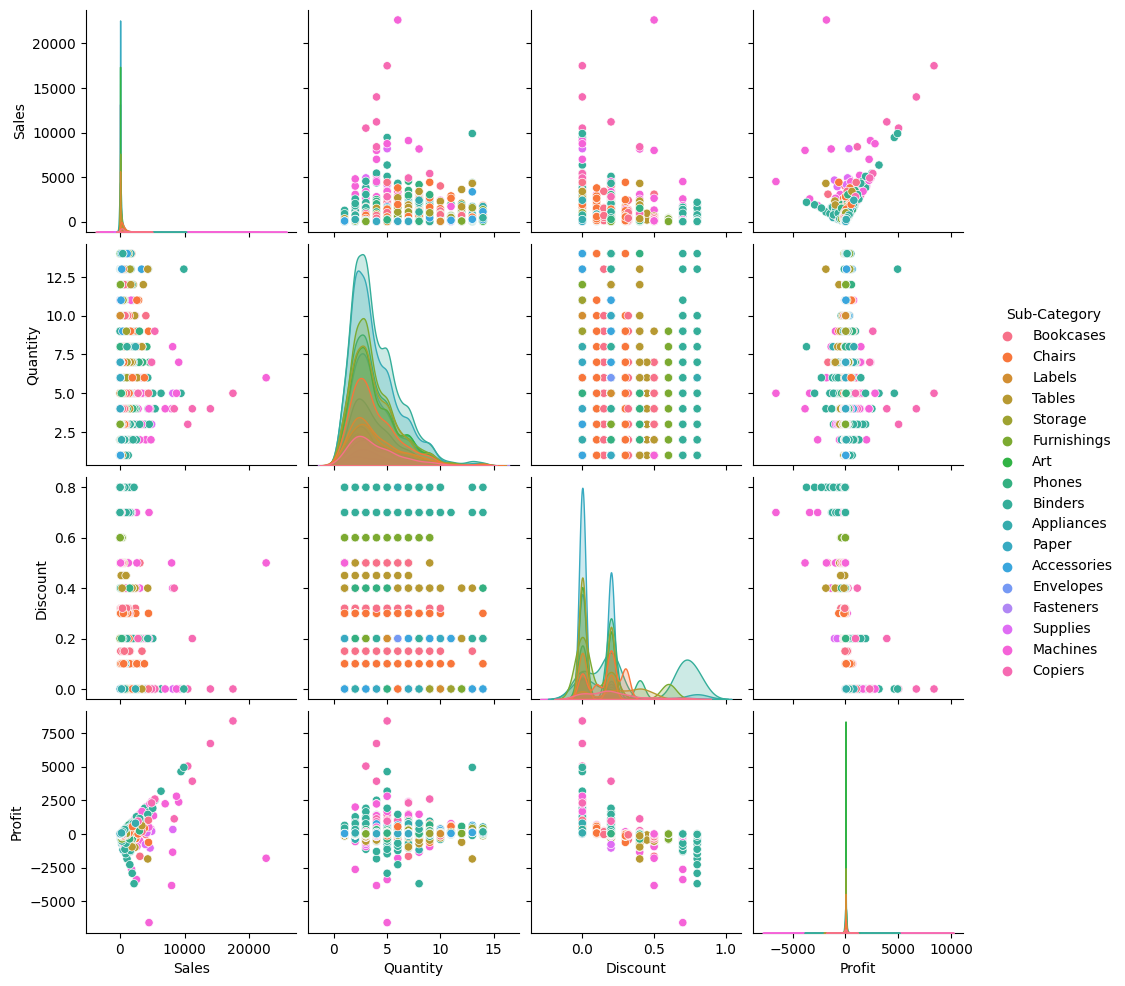

In [141]:
figsize=(15,10)
sns.pairplot(ssd,hue='Sub-Category')

**Summary of Data**

In [142]:
grouped=pd.DataFrame(ssd.groupby(['Ship Mode', 'Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
grouped

,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


**Statistical summary of data**
#using groupby function

In [143]:
ssd.groupby('State').Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76215.9705,38.492914,-325.5720,1906.4850,1980,13.44180,98.153037,9634.018666
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


**Pair plot of data**

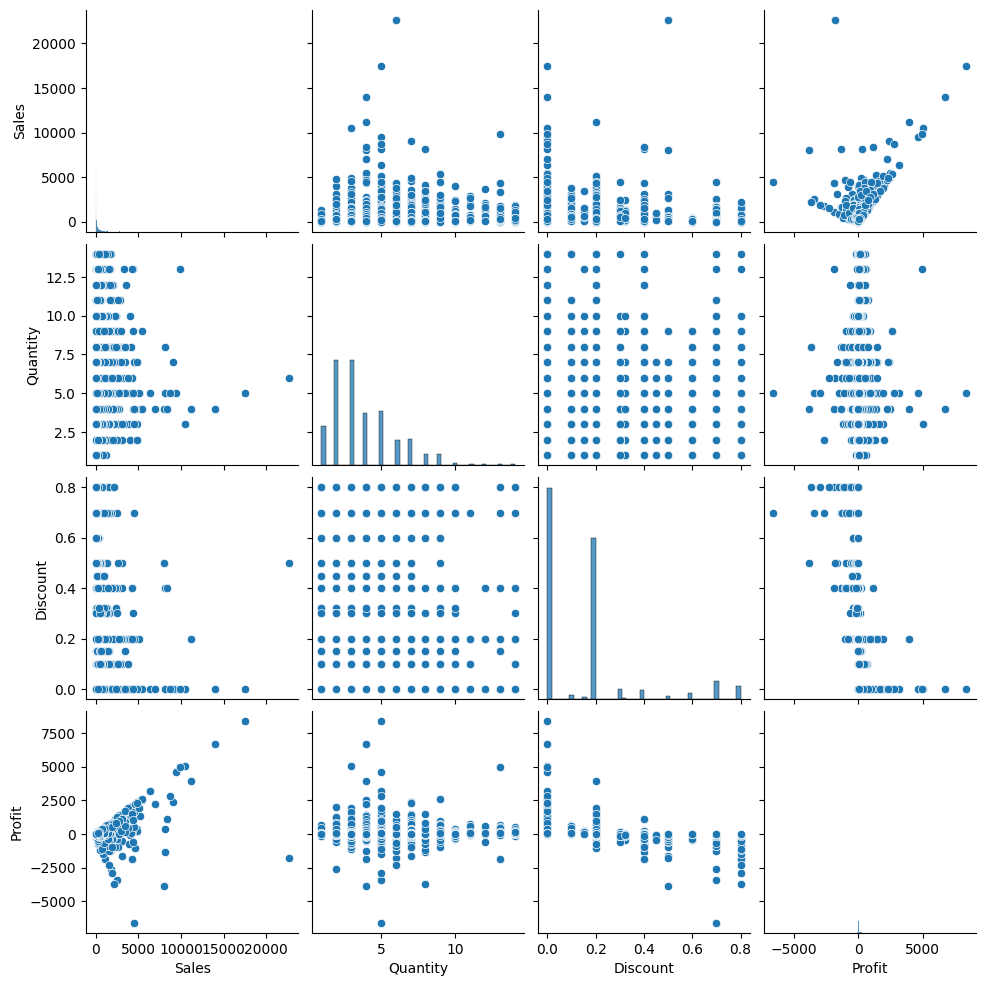

In [144]:
sns.pairplot(ssd)

**Box plot of Sales**

<Axes: >

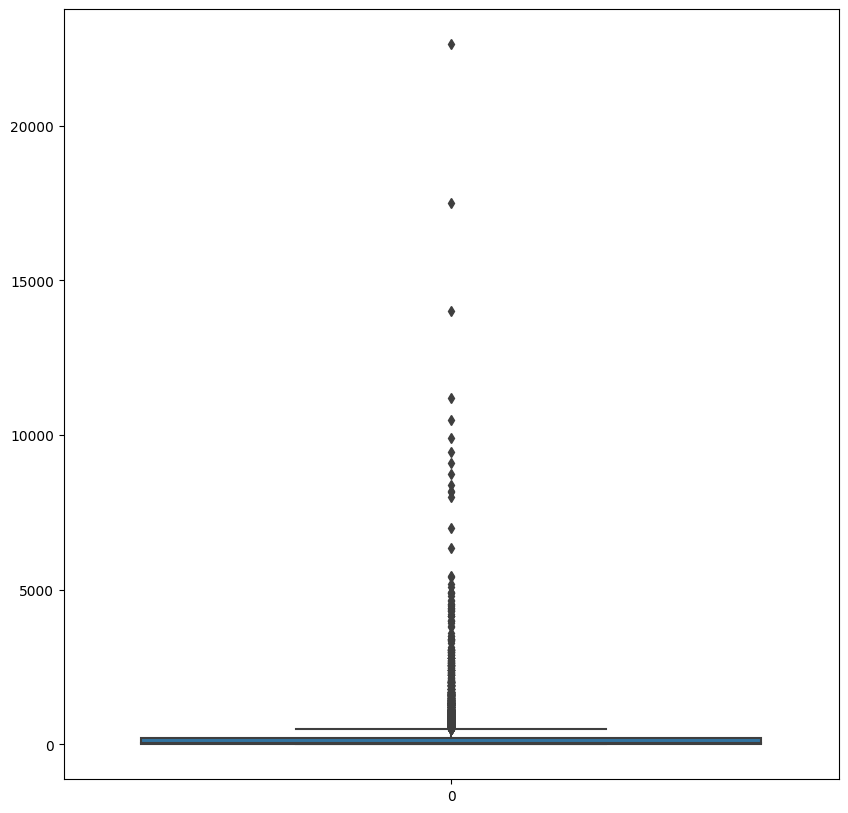

In [145]:
fig,axes = plt.subplots(figsize = (10 , 10))
sns.boxplot(ssd['Sales'])

**Box plot of Discount**

<Axes: >

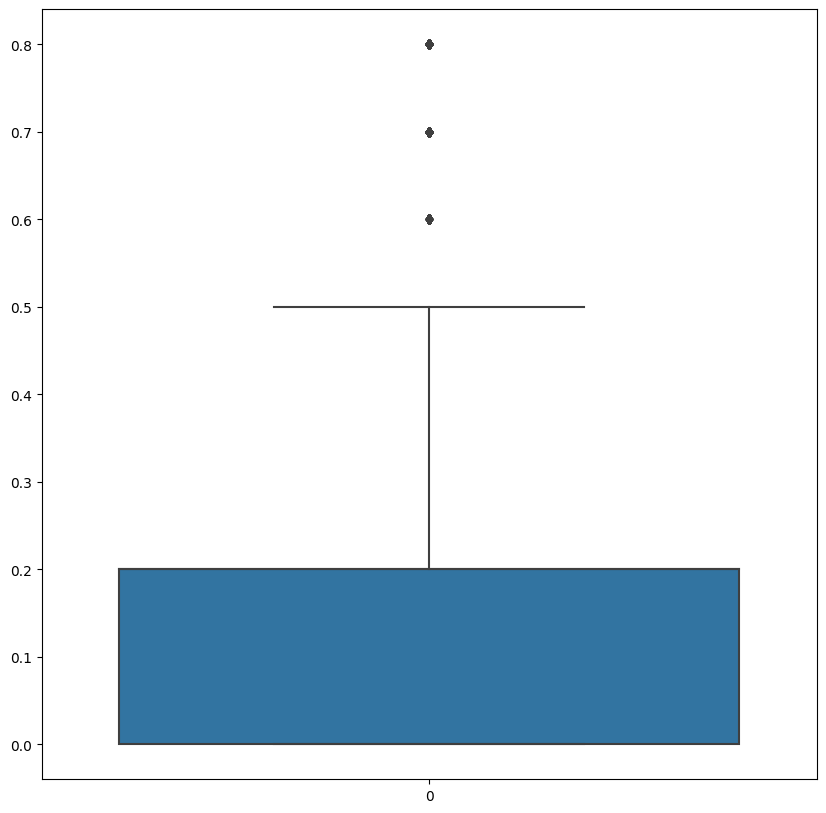

In [146]:
fig, axes = plt.subplots(figsize = (10, 10))
sns.boxplot(ssd['Discount'])

**Box plot of Profit**

<Axes: >

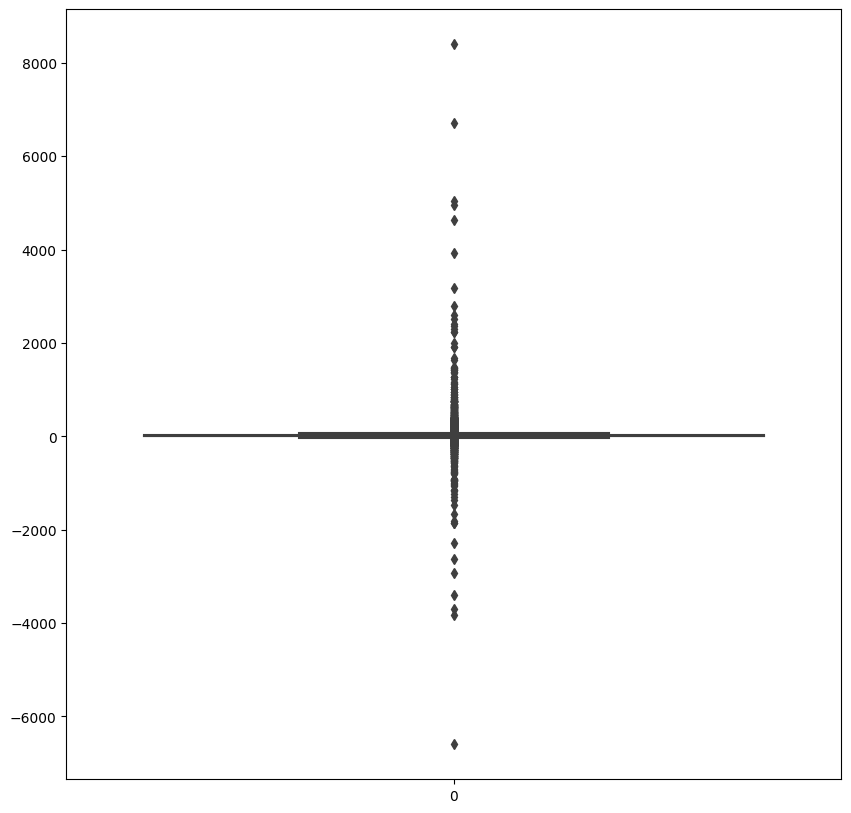

In [147]:
fig, axes = plt.subplots(figsize = (10,10))
sns.boxplot(ssd['Profit'])

In [148]:
Q1= ssd.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
Q3= ssd.quantile(q=0.75, axis = 0, numeric_only = True, interpolation = 'linear')

In [149]:
IQR =   Q3-Q1
print(IQR)

Sales       192.7640
Quantity      3.0000
Discount      0.2000
Profit       27.8099
dtype: float64


<Axes: xlabel='Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit'>

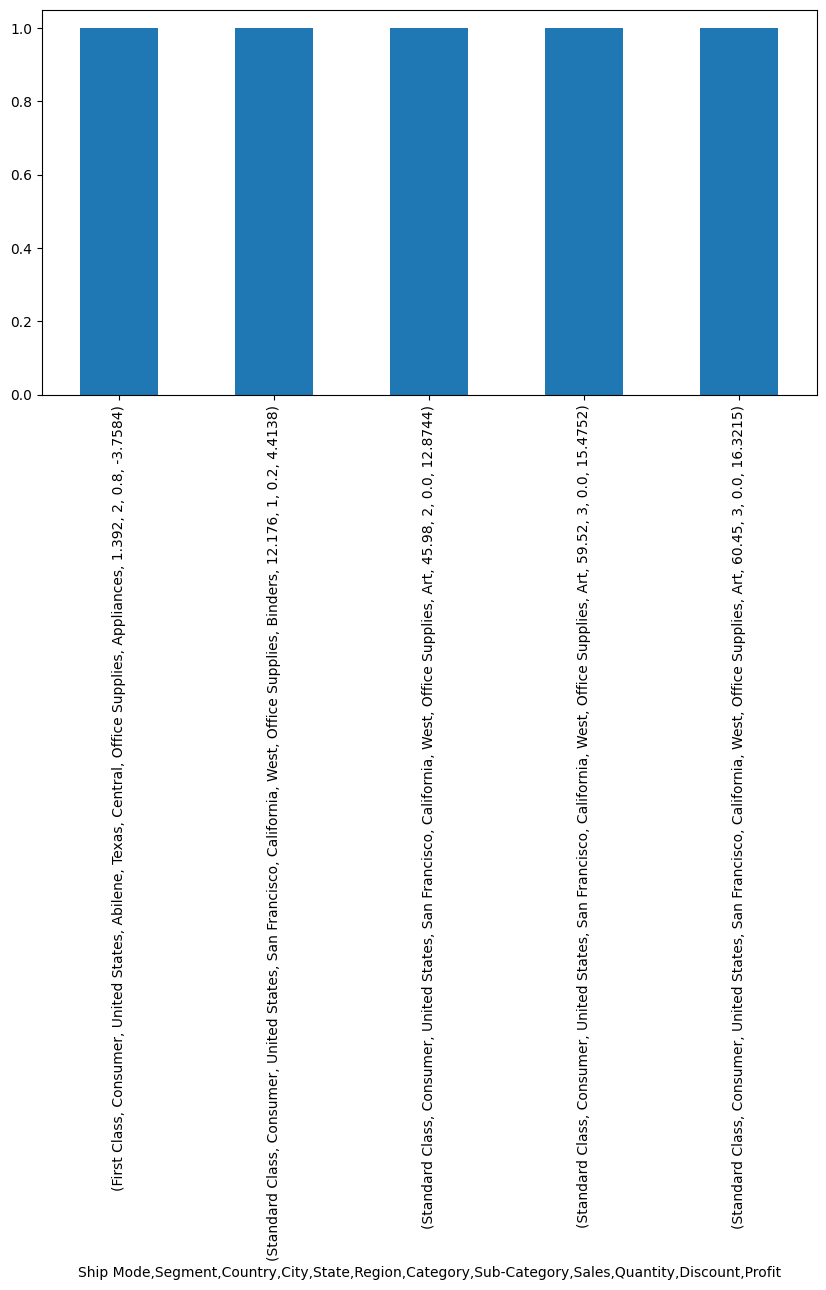

In [150]:
ssd.value_counts().nlargest().plot(kind = 'bar', figsize = (10,5))

**Plot of Value Counts**

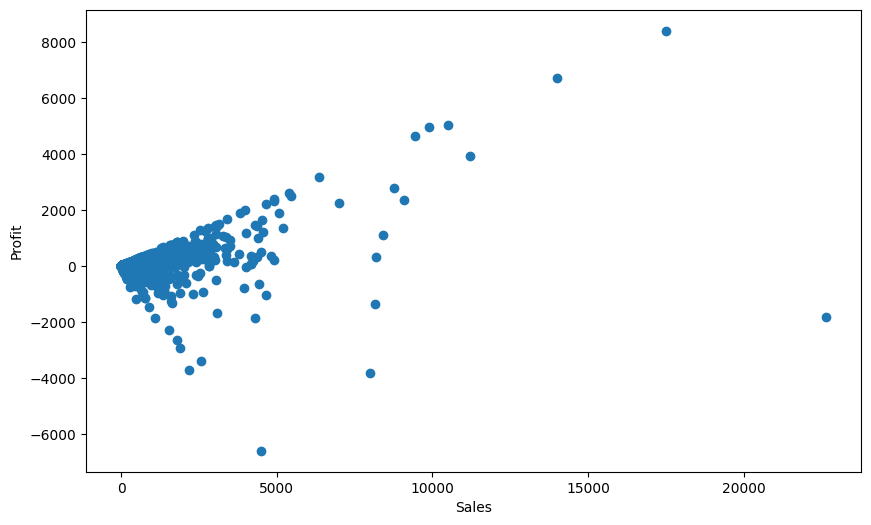

In [151]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(ssd['Sales'],ssd['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

**Sales Statistical data**

count     9944.000000
mean       230.752150
std        624.644765
min          0.444000
25%         17.340000
50%         55.000000
75%        210.104000
max      22638.480000
Name: Sales, dtype: float64


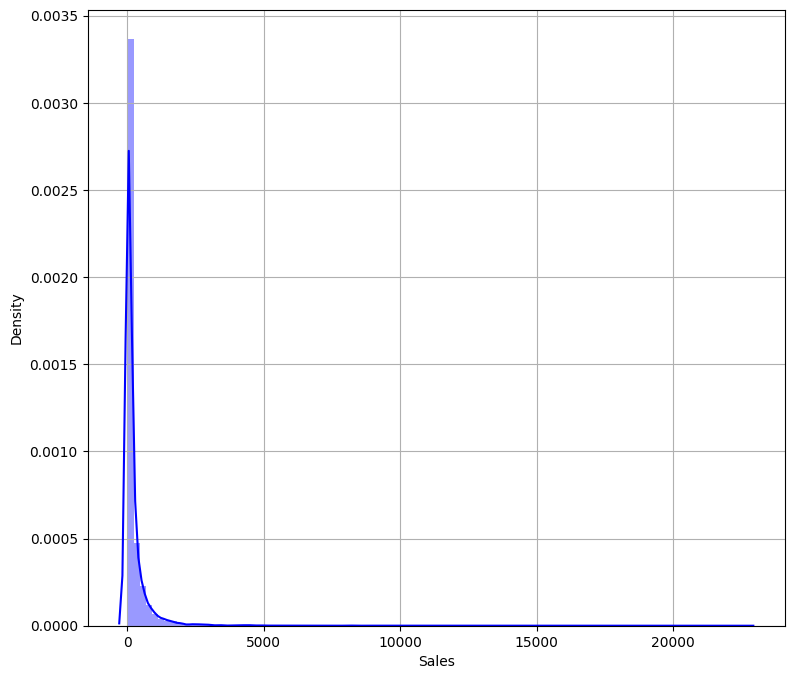

In [152]:
print(ssd['Sales'].describe())
plt.figure(figsize = (9, 8))
plt.grid()
sns.distplot(ssd['Sales'],color ='b',bins = 100, hist_kws={'alpha':0.4});

**Box plot of Sales, Quantity,Discount & Profit**

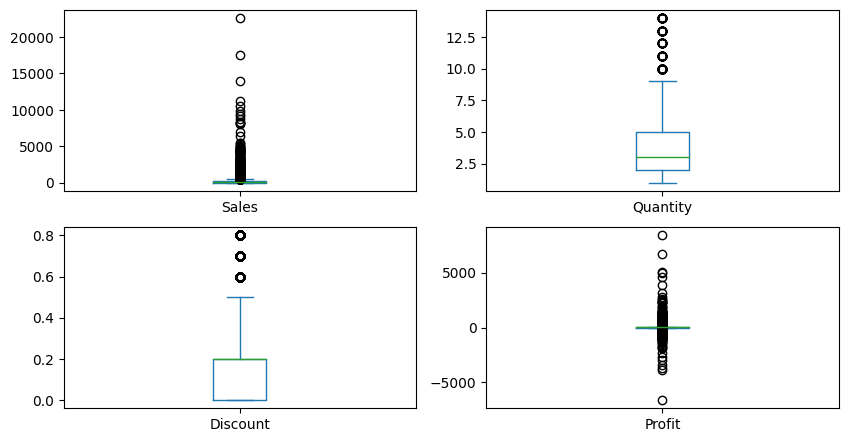

In [153]:
ssd.plot(kind='box',subplots=True,layout=(3,2),sharex=False,sharey=False)
plt.rcParams['figure.figsize'] = [14,12]
plt.show()

## *Conclusion*

**1.profit in south & central is less**

**2.profit in east and west regions is better than south and central**

**3.Highest profit earned in Copiers while selling price for Chairs and Phones is extremely high compared to other products**

**4.Another interesting fact- people dont prefer to buy Tables and Boookcases from superstore.Hence these departments are in loss**

**5.The store has a wide variety of office supplies especially in Binders and Paper department**  
**6.Negative correlation between profit and Discount  
Total sum of profit in sale of tables is negative**  


# To get more profit:-
##**Profit is more in sale of copiers**
No or very less profit in sale of supplies  
##*Technology segment is more profitable*